In [2]:
import cv2 as cv
from cv2 import aruco
import numpy as np
import os


def image_augmentation(frame, src_image, dst_points):
    src_h, src_w = src_image.shape[:2]
    frame_h, frame_w = frame.shape[:2]
    mask = np.zeros((frame_h, frame_w), dtype=np.uint8)
    src_points = np.array([[0, 0], [src_w, 0], [src_w, src_h], [0, src_w]])
    H, _ = cv.findHomography(srcPoints=src_points, dstPoints=dst_points)
    warp_image = cv.warpPerspective(src_image, H, (frame_w, frame_h))
    cv.imshow("warp image", warp_image)
    cv.fillConvexPoly(mask, dst_points, 255)
    results = cv.bitwise_and(warp_image, warp_image, frame, mask=mask)


def read_images(dir_path):
    img_list = []
    files = os.listdir(dir_path)
    for file in files:
        img_path = os.path.join(dir_path, file)
        image = cv.imread(img_path)
        img_list.append(image)
    return img_list


marker_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)

param_markers = aruco.DetectorParameters_create()

images_list = read_images("images")

cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    marker_corners, marker_IDs, reject = aruco.detectMarkers(
        gray_frame, marker_dict, parameters=param_markers
    )
    if marker_corners:
        for ids, corners in zip(marker_IDs, marker_corners):

            corners = corners.reshape(4, 2)
            corners = corners.astype(int)
            if ids[0] <= 4:
                image_augmentation(frame, images_list[ids[0]], corners)
            else:
                image_augmentation(frame, images_list[0], corners)
            # print(ids, "  ", corners)
    cv.imshow("frame", frame)
    key = cv.waitKey(1)
    if key == ord("q"):
        break
cap.release()
cv.destroyAllWindows()

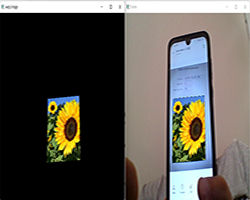